In [1]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [3]:
# checking the shape of the data
df.shape

(25979, 70)

In [5]:
# checking for null values
df.isna().sum()

match_api_id                            0
home_team_api_id                        0
away_team_api_id                        0
goal                                11762
shoton                              11762
shotoff                             11762
foulcommit                          11762
card                                11762
cross                               11762
corner                              11762
possession                          11762
B365H                                3387
B365D                                3387
B365A                                3387
BWH                                  3404
BWD                                  3404
BWA                                  3404
IWH                                  3459
IWD                                  3459
IWA                                  3459
LBH                                  3423
LBD                                  3423
LBA                                  3423
PSH                               

# Preprocessing

In [7]:
# creating a deep copy of match 
match_df = df.copy()

In [8]:
match_df.columns

Index(['match_api_id', 'home_team_api_id', 'away_team_api_id', 'goal',
       'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'league_name', 'country_name',
       'home_team_long_name', 'home_team_short_name',
       'home_team_overall_score', 'away_team_long_name',
       'away_team_short_name', 'away_team_overall_score', 'home_total_goal',
       'away_total_goal', 'home_players_avg_overall_rating',
       'home_players_avg_overall_score', 'home_players_avg_ideal_body_rate',
       'away_players_avg_overall_rating', 'away_players_avg_overall_score',
       'away_players_avg_ideal_body_rate', 'home_total_win',
       'home_total_loose', 'home_total_draw', 'away_total_win',
       'away_total_loose', 'away_total_draw'

In [9]:
# #droping some columns
# cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
#                'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
#                'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
#                'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
#                'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
#                'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
#                'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
#                'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
# match_df.drop(columns=cols_to_drop, inplace = True)

# # before removing bets
# cols_to_drop =['match_api_id' ,'PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA',
#                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
#                'country_name', 'league_name', 'team_long_name', 'team_short_name']
# match_df.drop(columns=cols_to_drop, inplace = True)

# removing bets too
cols_to_drop =['match_api_id', 'home_team_api_id', 'away_team_api_id' , 'B365H', 'B365D', 'B365A', 'BWH',
                'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
                'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
                'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA',
                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
                'country_name', 'league_name', 'home_team_long_name', 'home_team_short_name', 'away_team_long_name',
                'away_team_short_name']
match_df.drop(columns=cols_to_drop, inplace = True)

In [10]:
# shape after dropping columns
match_df.shape

(25979, 23)

In [11]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [12]:
# input shape
X.shape

(25979, 22)

In [13]:
# checking for data types
X.dtypes

home_team_overall_score             float64
away_team_overall_score             float64
home_total_goal                       int64
away_total_goal                       int64
home_players_avg_overall_rating     float64
home_players_avg_overall_score      float64
home_players_avg_ideal_body_rate    float64
away_players_avg_overall_rating     float64
away_players_avg_overall_score      float64
away_players_avg_ideal_body_rate    float64
home_total_win                        int64
home_total_loose                      int64
home_total_draw                       int64
away_total_win                        int64
away_total_loose                      int64
away_total_draw                       int64
league_home_total_win                 int64
league_home_total_loose               int64
league_home_total_draw                int64
league_away_total_win                 int64
league_away_total_loose               int64
league_away_total_draw                int64
dtype: object

## Handling Missing Values

In [14]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

d:\college\sem 3\project requirement gathering\Football-Prediction\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# !pip install imblearn

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5382038304433484

Classifier: DecisionTreeClassifier
Accuracy: 0.3982457668999845

Classifier: GaussianNB
Accuracy: 0.5050622711925439

Classifier: RandomForestClassifier
Accuracy: 0.4960168220019693

Classifier: XGBClassifier
Accuracy: 0.4953623984096748

Classifier: LGBMClassifier
Accuracy: 0.5071024427615527



In [19]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

# with bets
# Classifier: LogisticRegression
# Accuracy: 0.5321219921150571

# Classifier: DecisionTreeClassifier
# Accuracy: 0.3985523698173097

# Classifier: GaussianNB
# Accuracy: 0.3997069041781603

# Classifier: SVC
# Accuracy: 0.5260017070953372

# Classifier: RandomForestClassifier
# Accuracy: 0.49928845836102553

# Classifier: XGBClassifier
# Accuracy: 0.48962709154372847

# Classifier: LGBMClassifier
# Accuracy: 0.5067175535189948

In [20]:
def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate performance metrics
    accuracy = cm.diagonal().sum() / cm.sum()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

In [21]:
def print_cm(y_test,y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [22]:
def feature_importance(model_name):
    # plotting the important features from the input for better understanding
    importances= model_name.feature_importances_
    forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(forest_importances)
    ax.set_title("Feature importances")
    ax.set_ylabel("FI")
    fig.tight_layout()

### Train Test split for the Models

In [23]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

## Running SMOTE
In this section we are trying to use SMOTE technique which is a oversampling technique to balance the classes and run logistic regression to see if there is any changes to the accuracy of the model.

In [24]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_train_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

In [25]:
len(X_train_oversampled),len(X_train)

(25026, 18185)

In [26]:
np.unique(y_oversampled, return_counts=True)

(array([0, 1, 2]), array([8342, 8342, 8342], dtype=int64))

In [27]:
## Lets do the logistic regression
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train_oversampled,y_oversampled)

# predicting using LGBM model
y_pred_lr_smote = lr.predict(X_test)

In [28]:
# checking for the accuracy
lr.score(X_test,y_test)

0.49461123941493457

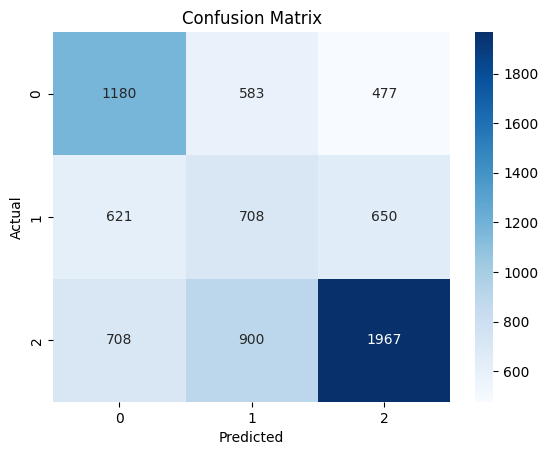

In [29]:
print_cm(y_test,y_pred_lr_smote)

## Checking LGBM

In [30]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(X_test)

In [31]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5228380805748011

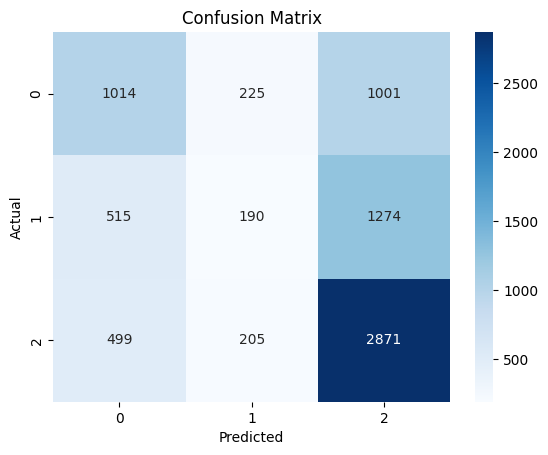

In [32]:
print_cm(y_test,y_pred_lgbm)

In [33]:
calculate_performance_metrics(y_test,y_pred_lgbm)

Accuracy: 0.5228380805748011
Precision: 0.4774175796284046
Recall: 0.5228380805748011
F1 Score: 0.4756909808248628


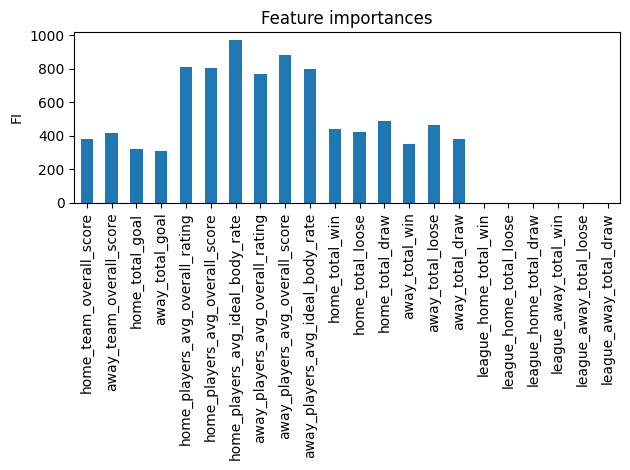

In [34]:
feature_importance(lgbm_classifier)

## Checking Random Forest

In [35]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# predicting using LGBM model
y_pred_rf = rf.predict(X_test)

In [36]:
# checking for the accuracy
rf.score(X_test,y_test)

0.4870413138311522

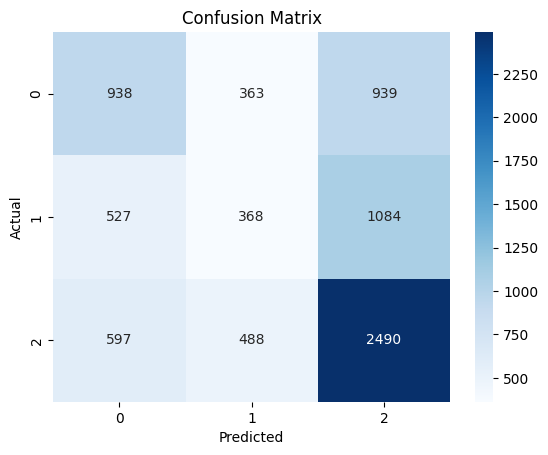

In [37]:
print_cm(y_test,y_pred_rf)

In [38]:
calculate_performance_metrics(y_test,y_pred_rf)

Accuracy: 0.4870413138311522
Precision: 0.46046628929746075
Recall: 0.4870413138311522
F1 Score: 0.466190592821576


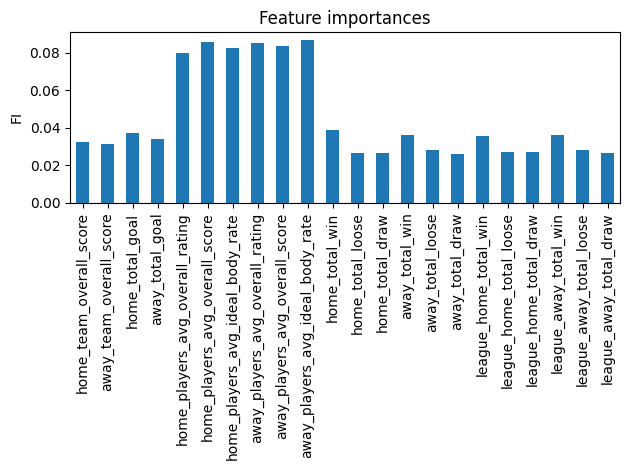

In [39]:
feature_importance(rf)

## Checking Logistic Regression

In [40]:
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train,y_train)

# predicting using LGBM model
y_pred_lr = lr.predict(X_test)

In [41]:
# checking for the accuracy
lr.score(X_test,y_test)

0.537721324095458

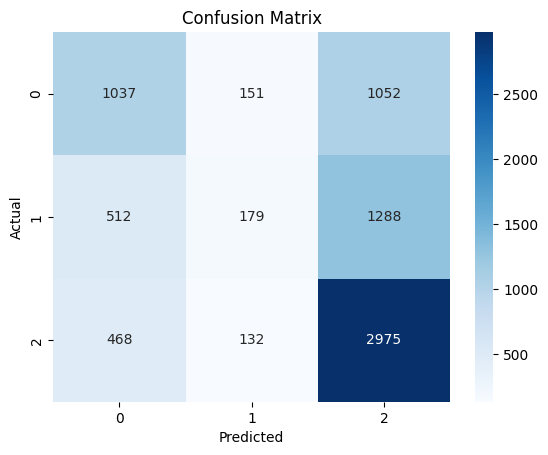

In [42]:
print_cm(y_test,y_pred_lr)

In [43]:
calculate_performance_metrics(y_test,y_pred_lr)

Accuracy: 0.537721324095458
Precision: 0.5028823073558695
Recall: 0.537721324095458
F1 Score: 0.48425475835137133


## Checking Decision Classifier

In [44]:
# checking using randomforest
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting using LGBM model
y_pred_dt = dt.predict(X_test)

In [45]:
# checking for the accuracy
dt.score(X_test,y_test)

0.4140364382858609

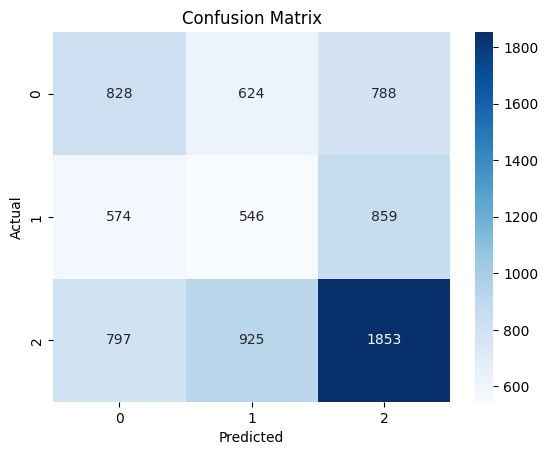

In [46]:
print_cm(y_test,y_pred_dt)

In [47]:
calculate_performance_metrics(y_test,y_pred_dt)

Accuracy: 0.4140364382858609
Precision: 0.4172328827662782
Recall: 0.4140364382858609
F1 Score: 0.4155432879371107


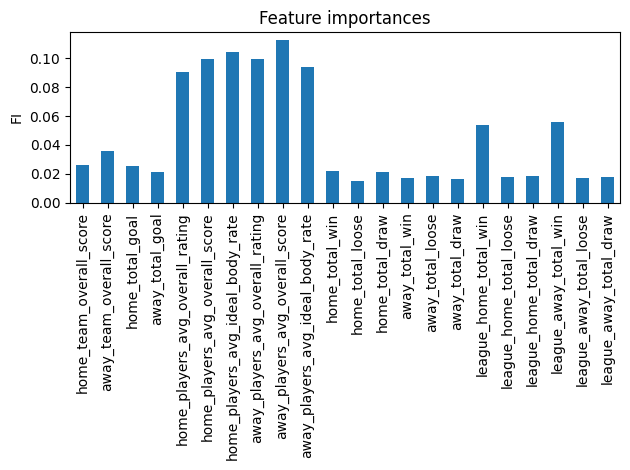

In [48]:
feature_importance(dt)

## Checking Naive Bays

In [49]:
# checking using randomforest
nb = GaussianNB()
nb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_nb = nb.predict(X_test)

In [50]:
# checking for the accuracy
nb.score(X_test,y_test)

0.5026943802925328

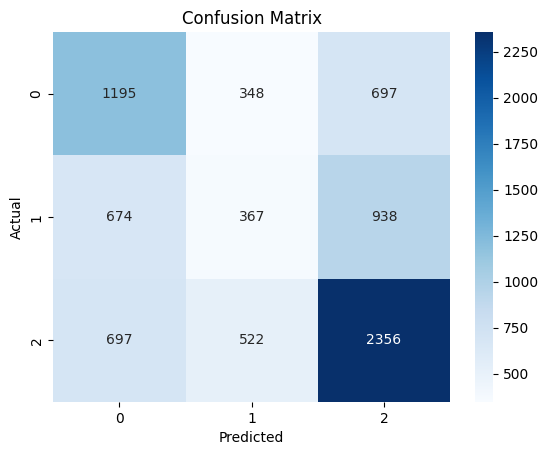

In [51]:
print_cm(y_test,y_pred_nb)

In [52]:
calculate_performance_metrics(y_test,y_pred_nb)

Accuracy: 0.5026943802925328
Precision: 0.47995177860254323
Recall: 0.5026943802925328
F1 Score: 0.48653786753179007


## Checking SVC

In [53]:
# checking using randomforest
svc = SVC()
svc.fit(X_train,y_train)

# predicting using LGBM model
y_pred_svc = svc.predict(X_test)

In [54]:
# checking for the accuracy
svc.score(X_test,y_test)

0.5300230946882217

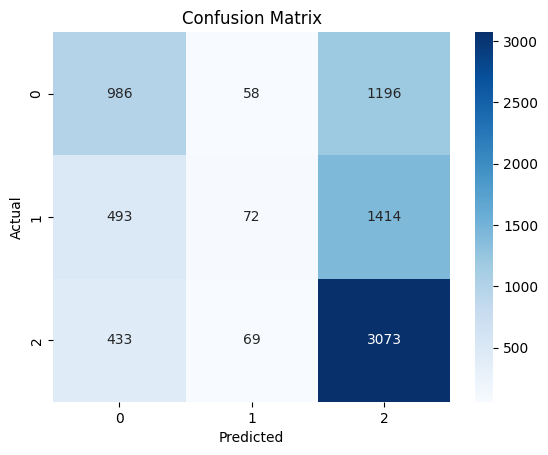

In [55]:
print_cm(y_test,y_pred_svc)

In [56]:
calculate_performance_metrics(y_test,y_pred_svc)

Accuracy: 0.5300230946882217
Precision: 0.48810572916079964
Recall: 0.5300230946882217
F1 Score: 0.4577916914674524


## Checking XGB

In [57]:
# checking using randomforest
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_xb = xb.predict(X_test)

In [58]:
# checking for the accuracy
xb.score(X_test,y_test)

0.5097510905824993

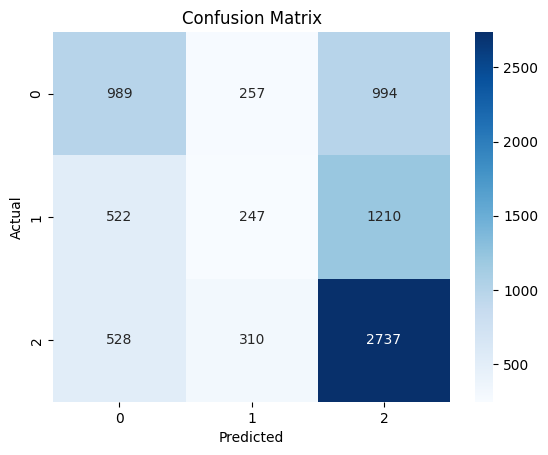

In [59]:
print_cm(y_test,y_pred_xb)

In [60]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5097510905824993
Precision: 0.4705316344961153
Recall: 0.5097510905824993
F1 Score: 0.472601808373212


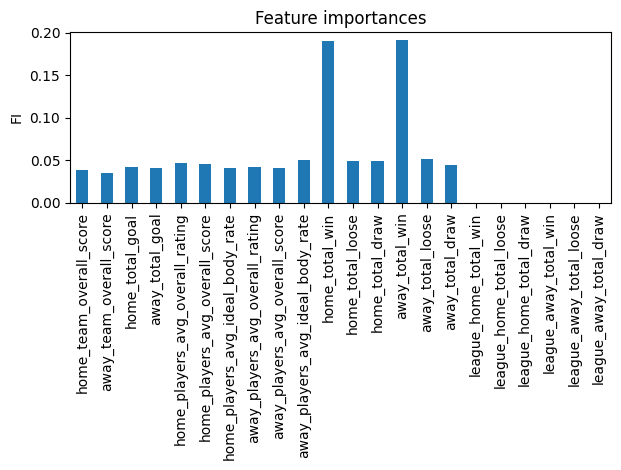

In [61]:
feature_importance(xb)

## Neural Network Model (Test)

In [62]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [63]:
# Create an instance of the OneHotEncoder
oh = OneHotEncoder()

# Fit and transform the categorical data
oh_encoded = oh.fit_transform(y_train.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded = oh_encoded.toarray()

# Fit and transform the categorical data
oh_encoded_test = oh.fit_transform(y_test.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded_test = oh_encoded_test.toarray()

In [68]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(518, activation='relu', input_shape=(22,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 518)               11914     
                                                                 
 dropout_4 (Dropout)         (None, 518)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               132864    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [70]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
# Train the model
history = model.fit(X_train,oh_encoded, epochs=10, batch_size=24,validation_data=(X_test,oh_encoded_test))

Epoch 1/10
758/758 [==============================] - 4s 4ms/step - loss: 0.9859 - accuracy: 0.5237 - val_loss: 0.9720 - val_accuracy: 0.5327
Epoch 2/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9743 - accuracy: 0.5315 - val_loss: 0.9741 - val_accuracy: 0.5323
Epoch 3/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9703 - accuracy: 0.5334 - val_loss: 0.9783 - val_accuracy: 0.5310
Epoch 4/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9688 - accuracy: 0.5358 - val_loss: 0.9770 - val_accuracy: 0.5294
Epoch 5/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9661 - accuracy: 0.5395 - val_loss: 0.9829 - val_accuracy: 0.5309
Epoch 6/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9643 - accuracy: 0.5418 - val_loss: 0.9810 - val_accuracy: 0.5307
Epoch 7/10
758/758 [==============================] - 3s 4ms/step - loss: 0.9655 - accuracy: 0.5420 - val_loss: 0.9699 - val_accuracy: 0.5341
Epoch 

In [72]:
## Let's plot the loss and accuracy curve of the NN model
def plot_loss_acc_curve(history):
    plt.plot(history.history['accuracy'],c = 'Red',label='Training-Accuracy')
    plt.plot(history.history['val_accuracy'],c='blue',label='Validation-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accurcay-Curve')
    plt.figure()
    plt.plot(history.history['loss'],c='red',label='Training-Loss')
    plt.plot(history.history['val_loss'],c='blue',label='Validation-Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss-Curve')
    plt.legend()
    plt.show()

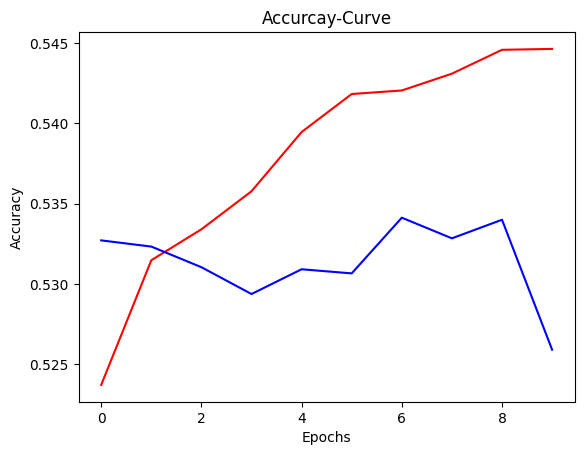

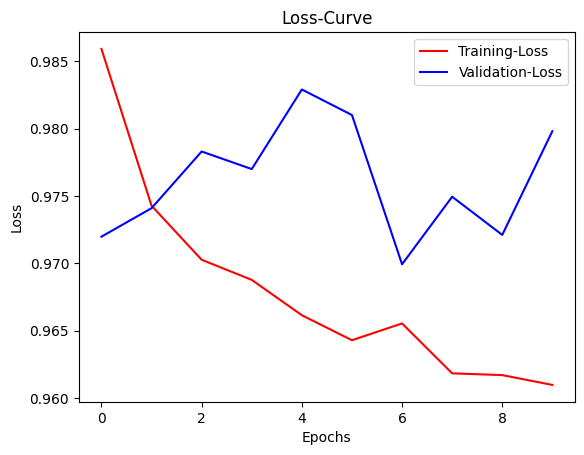

In [73]:
plot_loss_acc_curve(history)

In [74]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, oh_encoded_test)

244/244 [==============================] - 0s 2ms/step - loss: 0.9798 - accuracy: 0.5259


In [75]:
# Make predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

244/244 [==============================] - 0s 1ms/step


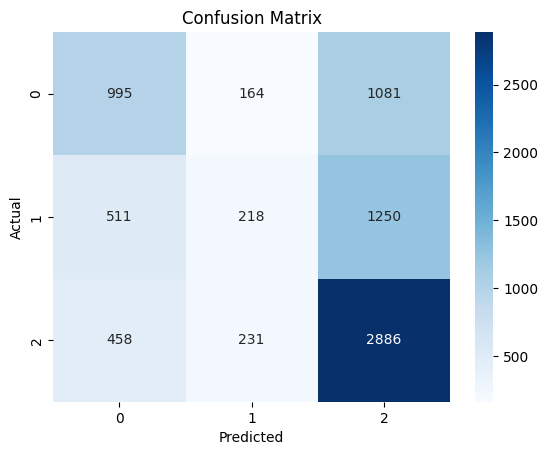

In [76]:
print_cm(y_test,predicted_labels)

In [77]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5097510905824993
Precision: 0.4705316344961153
Recall: 0.5097510905824993
F1 Score: 0.472601808373212


In [78]:
model.save('./final_model/nn_model.h5')